In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Kepler's laws

Johannes Kepler (1571-1630) was a German astronomer, who in the period 1609-1619 published his main astronomical work, the three laws of planetary motion.

1. The orbit of a planet is an ellipse with the Sun at one of the two foci.
2. A line segment joining a planet and the Sun sweeps out equal areas during equal intervals of time.
3. The square of the orbital period of a planet is proportional to the cube of the semi-major axis of its orbit.

In this lab, we are going to approximate the constant of proportionality in the third law, using some data from NASA's planetary fact sheet.

## Your task

As usual, your task is to complete the code for the calculations. Look for the comment `# Your code here` and complete the functions.

## Reading the data

The data we are going to use resides in a file called `planetary.csv`, which contains a number of data points on each of the planets in our solar system (including Pluto, which was demoted to a dwarf planet in 2006).

Your fist task is thus to write the function that takes the name of the file containing the data, and returning two lists, one containing the distances to the sun, and the other containing the orbital period. You will have to examine the file to see which columns you need.

In [2]:
def getData(fileName):
    """Assumes that fileName is the name of file in csv format containing the data on the planets
       Returns a pair (distances, periods) of lists of the distances to the sun, and the orbital periods"""
    f = open(fileName, 'r')
    # initialise masses & distances
    periods, distances = [], []
    # discard first line of the file
    f.readline()
    # now read the data
    for line in f:
        l = (line.split()[0]).split(",")
        distances.append(float(l[8]))
        periods.append(float(l[11]))
    f.close()
    return (distances, periods)

getData("planetary.csv")    

([57.9, 108.2, 149.6, 227.9, 778.6, 1433.5, 2872.5, 4495.1, 5906.4],
 [88.0, 224.7, 365.2, 687.0, 4331.0, 10747.0, 30589.0, 59800.0, 90560.0])

## Plotting the data and fitting a polynomial

As we saw, Kepler's third law tells us that the square of the orbital period is proportional to the cube of the semi-major axis. You can look up what the [semi-major axis](https://en.wikipedia.org/wiki/Semi-major_and_semi-minor_axes), and if you do that, you will see that it is the average of the perihelion (smallest distance to the sun) and the aphelion (largest distance to the sun), and you can see that this is the value in the "distance from sun" column.

Thus, your job now is to complete the following function definition, so that `fitData` will

1. Plot the cube of the distance on the x-axis vs the square of the orbital period on the y-axis.
2. Calculate a linear function that approximates the data.
3. Plot the linear function.
4. Calculate, and print the slope of that linear function.


SLope =  4.739550746295468e-08


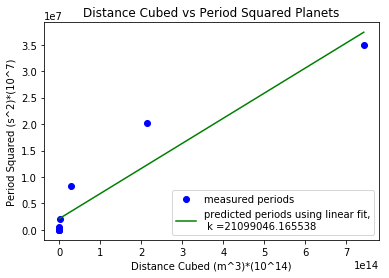

In [12]:
def fitData(fileName):
    """Assumes fileName is the name of the data.
       Creates plot, fits linear function and prints slope"""
    period, distances = getData(fileName)
    distanceCube = []
    periodSquare = []
    for i in distances:
        distanceCube.append(i**3)
    for i in period:
        periodSquare.append(i**2)
    a, b = pylab.polyfit(distanceCube, periodSquare, 1)
    predicted = []
    #print(distanceCube, periodSquare)
    for f in distanceCube:
        predicted.append(a*f + b)
    pylab.plot(distanceCube, periodSquare, "bo", label="measured periods")
    pylab.plot(distanceCube, predicted, "g", label="predicted periods using linear fit,\n k ={:2f}".format(1/a))
    pylab.title("Distance Cubed vs Period Squared Planets")
    pylab.xlabel("Distance Cubed (m^3)*(10^14)")
    pylab.ylabel("Period Squared (s^2)*(10^7)")
    pylab.legend(loc='lower right')
    print("SLope = ", a)

fitData("planetary.csv")

## A second attempt

One rather valid complaint we could make about the previous plot is that the last three planets, Uranus, Neptune and Pluto, will have an unreasonable influence on the data: if we accidentally doubled Mercury's orbital period, it would not change much in the calculation, but if we doubled Pluto's period, we would get a totally different answer.

In a second attempt, we will, instead of plotting the cube of the distance vs the square of the period, plot the logarithm of the distance vs the logarithm of the period, and approximate the constant of proportionality from that.

Thus, the function `fitData2` should:

1. Plot the distance to the sun (x-axis) vs orbital period (y-axis) in a log-log plot (i.e. both axes should be logarithmic).
2. Fit a linear function to the logarithm of the distance vs the logarithm of the orbit.
3. From this calculate the constant of proportionality of the cube of the distance vs the square of the orbital period.

Note that we cannot take the slope of the line that we calculate, since we have taken logarithms.

Let $d$ be the distance to the sun, and $p$ the orbital period, then $p^2 = k d^3$, where $k$ is the constant we are seeking. Taking logarithms give $\log p = \frac{3}{2} \log d + \frac{\log k}{2}$. From this follows that if our fitted line is $y = ax + b$, then $b \approx \frac{\log k}{2}$, so $k = e^{2b}$. 


Constant of proportionality k =  8.52301556672561


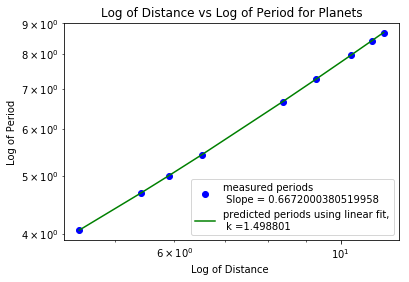

In [11]:
import math
def fitData2(fileName):
    """Assumes fileName is the name of the data.
       Creates plot, fits linear function and prints slope"""
    period, distances = getData(fileName)
    distanceLog = []
    periodLog = []
    for i in distances:
        distanceLog.append(log(i))
    for i in period:
        periodLog.append(log(i))
    a,b = pylab.polyfit(distanceLog, periodLog, 1)
    predicted = []
    for f in distanceLog:
        predicted.append(a*f + b)
    pylab.plot(distanceLog, periodLog, "bo", label="measured periods \n Slope = {}".format(a))
    pylab.plot(distanceLog, predicted, "g", label="predicted periods using linear fit,\n k ={:2f}".format(1/a))
    pylab.title("Log of Distance vs Log of Period for Planets")
    pylab.xlabel("Log of Distance ")
    pylab.ylabel("Log of Period")
    pyplot.yscale('log')
    pyplot.xscale('log')
    pylab.legend(loc='lower right')
    print ("Constant of proportionality k = ",e**(2*b))
fitData2("planetary.csv")
